**Proyecto 2 Mineria de datos**

- Integrantes: 

             - Hans Barnert
             - Agustín Soto
             - Sebastián Velazquez
             - Bruno Reyes

- Profesor:  
             - Sebastián Moreno

**Introducción**
El presente trabajo tiene como finalidad entrenar distintos modelos de predicción para así enfrentarse al problema que tiene la aerolínea PANAM cual es tratar de predecir dadas ciertas condiciones de un vuelo, si era factible realizar una sobreventa de asientos o no. Para ello se estudiaron los modelos KNN, regresión logística, Naive Bayes y árboles de decisión. Para llevar el trabajo a cabo se realizó una limpieza de los datos, posteriormente se realizó la selección de variables en el caso de los modelos paramétricos, a continuación se realizaron los entrenamientos de los modelos para distintos valores de los hiperparámetros para escoger el mejor valor de este, finalmente se evaluaron los desempeños de cada modelo, para finalmente escoger el que tuviera un mejor rendimiento y utilizarlo para predecir el set de datos de evaluación.

**CONTENIDO**

1.- Limpieza de datos

2.- Entrenando modelos de clasificación

3.- Selección del modelo final

4.- Evaluación de la segunda base de datos basado en la variable binaria no-show

Importación de datos

In [85]:
import pandas as pd
import numpy as np

In [105]:
df_evalData = pd.read_csv('ALUMNOS-evalData.csv')
df_trainData = pd.read_csv('ALUMNOS-trainData.csv')

In [87]:
df_evalData.info()
print("")
print("============================================================================")
print("")
df_trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248880 entries, 0 to 248879
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       248880 non-null  int64  
 1   date             248880 non-null  object 
 2   fligth_number    248880 non-null  int64  
 3   origin           248880 non-null  object 
 4   destination      248880 non-null  object 
 5   distance         248880 non-null  int64  
 6   denied_boarding  248880 non-null  int64  
 7   pax_midlow       248880 non-null  int64  
 8   pax_high         248880 non-null  int64  
 9   pax_midhigh      248880 non-null  int64  
 10  pax_low          248880 non-null  int64  
 11  pax_freqflyer    248880 non-null  int64  
 12  group_bookings   248880 non-null  int64  
 13  out_of_stock     248880 non-null  int64  
 14  dom_cnx          248880 non-null  int64  
 15  int_cnx          248880 non-null  int64  
 16  p2p              248880 non-null  int6

In [23]:
df_evalData.describe()

,Unnamed: 0,fligth_number,distance,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,pax_freqflyer,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,capacity,revenues_usd,bookings
count,2.488800e+05,248880.000000,248880.000000,248880.000000,248880.000000,248880.000000,248880.000000,248880.000000,248880.000000,248880.000000,248880.000000,248880.000000,248880.000000,248880.000000,248880.000000,248880.000000,248880.000000
mean,6.449045e+05,6109.286021,1461.298887,0.048461,75.521251,3.820974,6.324321,57.140184,16.789176,3.874928,0.094973,25.974928,26.805621,106.815357,178.145130,14889.329173,159.595906
std,3.877374e+05,2049.174719,1687.612009,0.555339,44.654099,7.233293,10.254639,38.423572,13.849779,12.382630,0.293179,32.417089,44.152368,65.497689,32.884798,18144.708900,68.694405
min,7.000000e+00,12.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,-6721.300000,1.000000
25%,3.142545e+05,5376.000000,538.000000,0.000000,46.000000,0.000000,0.000000,28.000000,7.000000,0.000000,0.000000,0.000000,0.000000,59.000000,150.000000,6295.600000,110.000000
50%,6.254505e+05,6036.000000,916.000000,0.000000,77.000000,1.000000,3.000000,55.000000,14.000000,0.000000,0.000000,12.000000,5.000000,99.000000,174.000000,9707.100000,151.000000
75%,9.478320e+05,7190.000000,1672.000000,0.000000,104.000000,4.000000,8.000000,82.000000,23.000000,0.000000,0.000000,42.000000,31.000000,147.000000,174.000000,15730.150000,200.000000
max,1.350378e+06,9264.000000,11380.000000,26.000000,415.000000,157.000000,220.000000,268.000000,234.000000,244.000000,1.000000,256.000000,339.000000,505.000000,400.000000,295708.200000,584.000000


In [ ]:
df_trainData.describe()

Contenido de las variables

In [ ]:
#df_evalData

In [ ]:
#df_trainData

#1.- Limpieza de datos

Primero que todo, vamos a analizar como están nuestros datos, si acaso existen datos nulos y/o duplicados, en caso de que existan vamos a proceder a eliminarlos, ya que estos pueden generar conflictos en nuestros resultados finales ya sea con errores o con bifurcación de la interpretación real de la situación dada.

Para evalData

In [88]:
print(df_evalData.loc[df_evalData.duplicated()].count()) # .duplicated() verifica la existencia de algún dato duplicado.

Unnamed: 0         0
date               0
fligth_number      0
origin             0
destination        0
distance           0
denied_boarding    0
pax_midlow         0
pax_high           0
pax_midhigh        0
pax_low            0
pax_freqflyer      0
group_bookings     0
out_of_stock       0
dom_cnx            0
int_cnx            0
p2p                0
departure_time     0
capacity           0
revenues_usd       0
bookings           0
dtype: int64


In [89]:
print(df_evalData.isnull().sum()) # .isnull() verifica la existencia de algún dato nulo.

Unnamed: 0           0
date                 0
fligth_number        0
origin               0
destination          0
distance             0
denied_boarding      0
pax_midlow           0
pax_high             0
pax_midhigh          0
pax_low              0
pax_freqflyer        0
group_bookings       0
out_of_stock         0
dom_cnx              0
int_cnx              0
p2p                  0
departure_time     345
capacity             0
revenues_usd         0
bookings             0
dtype: int64


In [108]:
df_evalData = df_evalData.dropna()
print(df_evalData.isnull().sum())

Unnamed: 0         0
date               0
fligth_number      0
origin             0
destination        0
distance           0
denied_boarding    0
pax_midlow         0
pax_high           0
pax_midhigh        0
pax_low            0
pax_freqflyer      0
group_bookings     0
out_of_stock       0
dom_cnx            0
int_cnx            0
p2p                0
departure_time     0
capacity           0
revenues_usd       0
bookings           0
dtype: int64


Para trainData

In [ ]:
print(df_trainData.loc[df_trainData.duplicated()].count()) # .duplicated() verifica la existencia de algún dato duplicado.

In [ ]:
print(df_trainData.isnull().sum()) # .isnull() verifica la existencia de algún dato nulo.

In [109]:
df_trainData = df_trainData.dropna()
print(df_trainData.isnull().sum())

Unnamed: 0         0
fligth_number      0
distance           0
noshow             0
denied_boarding    0
pax_midlow         0
pax_high           0
pax_midhigh        0
pax_low            0
pax_freqflyer      0
group_bookings     0
out_of_stock       0
dom_cnx            0
int_cnx            0
p2p                0
capacity           0
revenues_usd       0
bookings           0
dtype: int64


Con los procedimientos anteriores vimos que no existen datos duplicados en nuestros datasets, asimismo buscamos la existencia de datos nulos logrando encontrar unos cuantos, lo que se procedio a eliminarlos, con esto quedan los datos listos para trabajar.

#2.-  Modelo de clasificación, uno por cada integrante

-Hans Barnert

In [ ]:
df_trainData.loc[df_trainData['noshow'] <= 4, 'noshow'] = 0
df_trainData.loc[df_trainData['noshow'] > 4, 'noshow'] = 1
display(df_trainData['noshow'].sample(15))

Se eliminaron las variables categóricas dado que a aplicar OneHotEncoding generaba demasiadas dimensiones y esto generaba problemas al momento de entrenar el modelo.

In [107]:
categorical = df_trainData.iloc[:,[1,3,4,18]]
# df_trainData = pd.get_dummies(categorical)
df_trainData.drop(categorical, inplace=True, axis=1)
df_trainData

,Unnamed: 0,fligth_number,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,pax_freqflyer,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,capacity,revenues_usd,bookings
0,389083,8995,1394,9.0,0,94,2,28,94,22,19,0,1,0,239,174.0,10631.1,240
1,177073,7061,489,0.0,0,100,4,4,87,25,0,0,19,9,192,174.0,5453.7,220
2,1040357,8972,2180,4.0,0,7,1,5,64,2,0,0,0,10,69,218.0,16161.0,79
3,505258,6039,524,13.0,0,54,4,7,21,4,0,0,26,0,64,174.0,10828.7,90
4,369663,7713,1170,14.0,0,21,88,18,82,0,88,1,23,3,183,144.0,16721.6,209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999885,359783,6024,552,5.0,0,25,12,20,4,12,0,0,64,9,0,144.0,14102.1,73
999886,152315,6669,3934,4.0,0,129,3,19,121,2,20,0,0,118,156,168.0,32907.8,274
999887,1000747,9094,1430,5.0,0,2,1,0,108,20,36,0,7,0,124,218.0,13519.3,131
999888,117952,7704,1091,2.0,0,67,2,7,42,16,0,0,34,2,98,144.0,8729.6,134


In [ ]:
import numpy as np
import pandas as pd
from plotnine import *
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

train = df_trainData
eval = df_evalData
b = pd.DataFrame(train['noshow'])
a = (train.drop(columns=['noshow']))
X_train, X_test, y_train, y_test = train_test_split(a,b, test_size=0.3, random_state=42)

Entrenando el modelo.

In [ ]:
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
a = (df_trainData.drop(columns=['noshow']))
b = pd.DataFrame(train['noshow'])
numFolds=10
kf = KFold(n_splits=numFolds,shuffle=True)
for i in range(1,25):
    AD = DecisionTreeClassifier(max_depth=i)

    #Generando los k-fold
    temp=kf.split(a)

    errorTest=np.zeros((numFolds,1))
    errorTrain=np.zeros((numFolds,1))
    index=0
    for train_index, test_index in temp:
        AD = AD.fit(a.iloc[train_index,:],b.iloc[train_index,:])
        resultado=AD.predict(a.iloc[test_index,:])
        errorTest[index] = f1_score(b.iloc[test_index],resultado)

        resultado=AD.predict(a.iloc[train_index,:])
        errorTrain[index] = f1_score(b.iloc[train_index],resultado)


        index+=1
    print(f"Errores con máximo de profundidad {i}:")
    print("Train: ",errorTrain.mean(),"+-",errorTrain.std())
    print("Test: ",errorTest.mean(),"+-",errorTest.std())

In [ ]:
'''
Errores con máximo de profundidad 1:
Train:  0.6614784020003548 +- 0.0001887017607410128
Test:  0.6614759892666804 +- 0.001696509911053428
Errores con máximo de profundidad 2:
Train:  0.7099284669900174 +- 0.00010516110710079574
Test:  0.7099200234945213 +- 0.0009338125515471541
Errores con máximo de profundidad 3:
Train:  0.6902712480574398 +- 0.00041097395346340585
Test:  0.690230496791753 +- 0.0015046861174831492
Errores con máximo de profundidad 4:
Train:  0.6918081500334365 +- 0.0021643695828875223
Test:  0.6915067663163678 +- 0.0022427496419493535
Errores con máximo de profundidad 5:
Train:  0.6892297352626618 +- 0.0024373526929998357
Test:  0.6890041925965333 +- 0.003203163771772659
'''

Como podemos ver el mejor resultado arrojado fue para el valor de 2 niveles de profundidad del árbol.

-Agustín Soto

Se descartan las variables categóricas con el fin de evitar aumentar excesivamente el número de dimensiones y la multicolinealidad.

Separamos la variable a predecir de las demás.

In [28]:
X = df_trainData[['Unnamed: 0',
       'distance', 'denied_boarding', 'pax_midlow', 'pax_high',
       'pax_midhigh', 'pax_low', 'pax_freqflyer', 'group_bookings',
       'out_of_stock', 'dom_cnx', 'int_cnx', 'p2p',
       'capacity', 'revenues_usd', 'bookings']]

Y = df_trainData[['noshow']]

Procedemos a descartar las variables numéricas que generar multicolinealidad para así entrenar correctamente el modelo. Para determinarla utilizaremos el factor VIF: https://www.researchgate.net/profile/Noora-Shrestha/publication/342413955_Detecting_Multicollinearity_in_Regression_Analysis/links/5eff2033458515505087a949/Detecting-Multicollinearity-in-Regression-Analysis.pdf

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

c:\Users\56967\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars


            feature        VIF
0        Unnamed: 0   4.027103
1          distance   8.056587
2   denied_boarding   1.016428
3        pax_midlow        inf
4          pax_high        inf
5       pax_midhigh        inf
6           pax_low        inf
7     pax_freqflyer        inf
8    group_bookings   1.202758
9      out_of_stock   1.174046
10          dom_cnx        inf
11          int_cnx        inf
12              p2p        inf
13         capacity  18.077226
14     revenues_usd   8.456888
15         bookings        inf


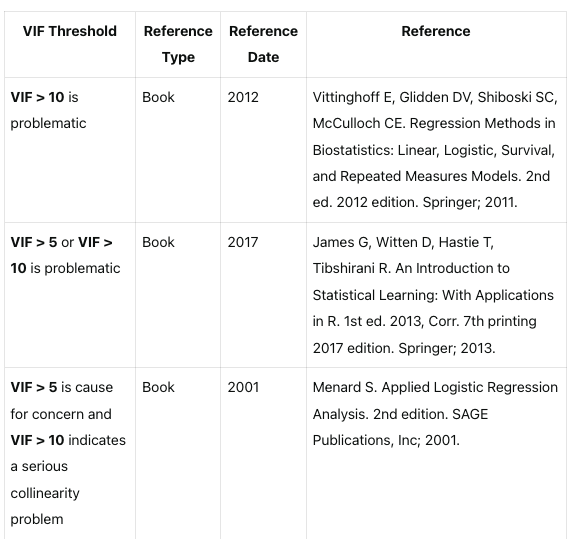

Procedemos a descartar variables.

In [30]:
X = X.drop(labels=["pax_freqflyer", "pax_midlow","pax_high","pax_midhigh","pax_low","dom_cnx","bookings","int_cnx","p2p"],axis=1)
X

,Unnamed: 0,distance,denied_boarding,group_bookings,out_of_stock,capacity,revenues_usd
0,389083,1394,0,19,0,174.0,10631.1
1,177073,489,0,0,0,174.0,5453.7
2,1040357,2180,0,0,0,218.0,16161.0
3,505258,524,0,0,0,174.0,10828.7
4,369663,1170,0,88,1,144.0,16721.6
...,...,...,...,...,...,...,...
999885,359783,552,0,0,0,144.0,14102.1
999886,152315,3934,0,20,0,168.0,32907.8
999887,1000747,1430,0,36,0,218.0,13519.3
999888,117952,1091,0,0,0,144.0,8729.6


Busqueda de hiperparámetros: según el profesor no era necesario hacer una búsqueda de hiperparámetros debido a que no se trabajaron en clases, sin embargo decidí hacer búsqueda de estos utilizando GridSearchCV.
https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/

In [31]:
# Load libraries
from scipy.stats import uniform
from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV


logistic = linear_model.LogisticRegression()

# define search space
space = dict()

space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]


search = GridSearchCV(logistic, space, scoring='f1', cv=10)
# execute search
result = search.fit(np.array(X), np.ravel(Y))
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)


c:\Users\56967\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
c:\Users\56967\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
c:\Users\56967\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
c:\Users\56967\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
c:\Users\56967\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
c:\Users\56967\AppData\Local\Programs\Python\

KeyboardInterrupt: 

In [ ]:
"""Best Score: 0.7918912037167016
Best Hyperparameters: {'C': 1e-05, 'penalty': 'l2'}"""

Todas combinaciones de variables.

In [ ]:
from itertools import compress, product

def combinations(items):
    return (list(compress(items,mask)) for mask in product(*[[0,1]]*len(items)) )
    # alternative:

comb = list(combinations(list(X)))[1:]
for combination in comb:
  print(combination)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn import metrics as mt

for i in range(len(comb)):

  print(f"Si consideramos las variables: {list(comb[i])}")

  numFolds=10

  kf = KFold(n_splits=numFolds,shuffle=True)
  LG = LogisticRegression(solver='liblinear',penalty="l2",
                          C=100)
  #Generando los k-fold
  temp=kf.split(X[list(comb[i])])

  errorTrain = np.zeros(10)
  errorTest = np.zeros(10)

  index=0
  for train_index, test_index in temp:
      
      trainData = np.array(X[list(comb[i])])[train_index, :]
      testData = np.array(X[list(comb[i])])[test_index, :]
      
      trainTarget = np.ravel(Y)[train_index]
      testTarget = np.ravel(Y)[test_index]
      
      LG = LG.fit(trainData,trainTarget)
      prediccion= LG.predict(trainData)
      errorTrain[index]=mt.f1_score(trainTarget, prediccion)
      
      prediccion = LG.predict(testData)
      errorTest[index]=mt.f1_score(testTarget, prediccion)
      index+=1
      
  print("F1-score modelo para training: ", errorTrain.mean(), "+-", errorTrain.std())
  print("F1-score modelo para test: ", errorTest.mean(), "+-", errorTest.std())

El mejor desempeño lo tienen  las variables: ['Unnamed: 0', 'distance', 'denied_boarding', 'group_bookings', 'capacity', 'revenues_usd']



F1-score modelo para training:  0.7918933076191702 +- 0.0001060916043059211


F1-score modelo para test:  0.7918950747608815 +- 0.0009472472385575736



Aunque es llamativo que todas las variables tienen  desempeños similares entre sí

In [33]:
new_X = X[['Unnamed: 0', 'distance', 'denied_boarding', 'group_bookings', 'capacity', 'revenues_usd']]

Entrenaremos utilizando k-fold considerando esta última selección

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn import metrics as mt

numFolds=10
kf = KFold(n_splits=numFolds,shuffle=True)
LG = LogisticRegression(solver='liblinear',penalty="l2",
                          C=1e-05)
#Generando los k-fold
temp=kf.split(new_X)
errorTrain = np.zeros(10)
errorTest = np.zeros(10)

index=0
for train_index, test_index in temp:
      
  trainData = np.array(new_X)[train_index, :]
  testData = np.array(new_X)[test_index, :]
      
  trainTarget = np.ravel(Y)[train_index]
  testTarget = np.ravel(Y)[test_index]
      
  LG = LG.fit(trainData,trainTarget)
  prediccion= LG.predict(trainData)
  errorTrain[index]=mt.f1_score(trainTarget, prediccion)
      
  prediccion = LG.predict(testData)
  errorTest[index]=mt.f1_score(testTarget, prediccion)
  index+=1
  print("iteracion: ",index+1)
      
print("F1-score modelo para training: ", errorTrain.mean(), "+-", errorTrain.std())
print("F1-score modelo para test: ", errorTest.mean(), "+-", errorTest.std())

Resultado:
F1-score modelo para training:  0.7918952844676872 +- 0.00010320078978626482
F1-score modelo para test:  0.7918897513842513 +- 0.000956487113252166

-Sebastián Velásquez

In [110]:
y = df_trainData['noshow'].apply(lambda x: 1 if x>=4.0 else 0) #Source: https://www.geeksforgeeks.org/using-apply-in-pandas-lambda-functions-with-multiple-if-statements/
y

0         1
1         0
2         1
3         1
4         1
         ..
999885    1
999886    1
999887    1
999888    0
999889    1
Name: noshow, Length: 998472, dtype: int64

In [92]:
#Proporción de las variables target

print(f'Cantidad de no show mayor a 4: {y[y == 1].count()}')
print(f'Cantidad de no show menor a 4: {y[y != 1].count()}') 

Cantidad de no show mayor a 4: 655277
Cantidad de no show menor a 4: 344613


Notamos que no es tan significativo, ya que la cantidad de noshow mayor que 4 asientos es mayor por al redededor de 50% mas que no show menor a 4, por ende no consideraremos necesario balancear estos datos.

In [93]:
df_trainData['noshow']

0          9.0
1          0.0
2          4.0
3         13.0
4         14.0
          ... 
999885     5.0
999886     4.0
999887     5.0
999888     2.0
999889    10.0
Name: noshow, Length: 999890, dtype: float64

In [111]:
y = df_trainData['noshow'].apply(lambda x: 1 if x>=4.0 else 0) #Source: https://www.geeksforgeeks.org/using-apply-in-pandas-lambda-functions-with-multiple-if-statements/

In [95]:
df_trainData.head(1)

,Unnamed: 0,date,fligth_number,origin,destination,distance,noshow,denied_boarding,pax_midlow,pax_high,...,pax_freqflyer,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,departure_time,capacity,revenues_usd,bookings
0,389083,2009-11-09,8995,BBA,SCL,1394,9.0,0,94,2,...,22,19,0,1,0,239,10:30:00,174.0,10631.1,240


In [112]:
# find numerical variables

numerical = [var for var in df_trainData.columns if df_trainData[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 18 numerical variables

The numerical variables are : ['Unnamed: 0', 'fligth_number', 'distance', 'noshow', 'denied_boarding', 'pax_midlow', 'pax_high', 'pax_midhigh', 'pax_low', 'pax_freqflyer', 'group_bookings', 'out_of_stock', 'dom_cnx', 'int_cnx', 'p2p', 'capacity', 'revenues_usd', 'bookings']


In [113]:
# find categorical variables

categorical = [var for var in df_trainData.columns if df_trainData[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 0 categorical variables

The categorical variables are :

 []


In [114]:
#Seleccion de variables

X = df_trainData[['fligth_number', 'distance', 'denied_boarding', 'pax_midlow', 'pax_high', 'pax_midhigh', 'pax_low', 
                       'pax_freqflyer', 'group_bookings', 'out_of_stock', 'dom_cnx', 'int_cnx', 'p2p', 'capacity', 'revenues_usd', 'bookings', 'bookings']]


X.head(1)

,fligth_number,distance,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,pax_freqflyer,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,capacity,revenues_usd,bookings,bookings
0,8995,1394,0,94,2,28,94,22,19,0,1,0,239,174.0,10631.1,240,240


In [99]:
X.head()

,fligth_number,distance,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,pax_freqflyer,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,capacity,revenues_usd,bookings,bookings
0,8995,1394,0,94,2,28,94,22,19,0,1,0,239,174.0,10631.1,240,240
1,7061,489,0,100,4,4,87,25,0,0,19,9,192,174.0,5453.7,220,220
2,8972,2180,0,7,1,5,64,2,0,0,0,10,69,218.0,16161.0,79,79
3,6039,524,0,54,4,7,21,4,0,0,26,0,64,174.0,10828.7,90,90
4,7713,1170,0,21,88,18,82,0,88,1,23,3,183,144.0,16721.6,209,209


In [115]:
y

0         1
1         0
2         1
3         1
4         1
         ..
999885    1
999886    1
999887    1
999888    0
999889    1
Name: noshow, Length: 998472, dtype: int64

Ahora se realizara el testeo de datos, para eso se eligio como hiperparametro el var_smoothing, donde los valores seleccionados fueron {1e-09, 1e-05, 1e-01} que corresponde al suavizado de variables

In [103]:
from sklearn.model_selection import KFold
from sklearn import metrics as mt
from sklearn.naive_bayes import GaussianNB


for i in range(1, 11):#print(f"Si consideramos las variables: {list(X[i])}")

  numFolds=10

  kf = KFold(n_splits=numFolds,shuffle=True)
  nb1 = GaussianNB(var_smoothing=1e-09)
  #Generando los k-fold
  temp=kf.split(X)

  errorTrain = np.zeros(10)
  errorTest = np.zeros(10)

  index=0
  for train_index, test_index in temp:
      
      trainData = np.array(X)[train_index, :]
      testData = np.array(X)[test_index, :]
      
      trainTarget = np.ravel(y)[train_index]
      testTarget = np.ravel(y)[test_index]
      
      nb1 = nb1.fit(trainData,trainTarget)
      prediccion= nb1.predict(trainData)
      errorTrain[index]=mt.f1_score(trainTarget, prediccion)
      
      prediccion = nb1.predict(testData)
      errorTest[index]=mt.f1_score(testTarget, prediccion)
      index+=1
      
print("F1-score modelo para training: ", errorTrain.mean(), "+-", errorTrain.std())
print("F1-score modelo para test: ", errorTest.mean(), "+-", errorTest.std())

KeyboardInterrupt: 

var_smooting 1e-09
F1-score modelo para training:  0.7676729541088687 +- 0.0005661145381702724
F1-score modelo para test:  0.7676703499077393 +- 0.0013161426249932284

In [ ]:
for i in range(1, 11):  #print(f"Si consideramos las variables: {list(X[i])}")

  numFolds=10

  kf = KFold(n_splits=numFolds,shuffle=True)
  nb1 = GaussianNB(var_smoothing=1e-05)
  #Generando los k-fold
  temp=kf.split(X)

  errorTrain = np.zeros(10)
  errorTest = np.zeros(10)

  index=0
  for train_index, test_index in temp:
      
      trainData = np.array(X)[train_index, :]
      testData = np.array(X)[test_index, :]
      
      trainTarget = np.ravel(y)[train_index]
      testTarget = np.ravel(y)[test_index]
      
      nb1 = nb1.fit(trainData,trainTarget)
      prediccion= nb1.predict(trainData)
      errorTrain[index]=mt.f1_score(trainTarget, prediccion)
      
      prediccion = nb1.predict(testData)
      errorTest[index]=mt.f1_score(testTarget, prediccion)
      index+=1
      
print("F1-score modelo para training: ", errorTrain.mean(), "+-", errorTrain.std())
print("F1-score modelo para test: ", errorTest.mean(), "+-", errorTest.std())

var_smoothing 1e-05
F1-score modelo para training:  0.784720260675608 +- 0.00016503683600702023
F1-score modelo para test:  0.7847103339369854 +- 0.0015593130797103667

In [ ]:
for i in range(1, 11):  #print(f"Si consideramos las variables: {list(X[i])}")

  numFolds=10

  kf = KFold(n_splits=numFolds,shuffle=True)
  nb1 = GaussianNB(var_smoothing=1e-01)
  #Generando los k-fold
  temp=kf.split(X)

  errorTrain = np.zeros(10)
  errorTest = np.zeros(10)

  index=0
  for train_index, test_index in temp:
      
      trainData = np.array(X)[train_index, :]
      testData = np.array(X)[test_index, :]
      
      trainTarget = np.ravel(y)[train_index]
      testTarget = np.ravel(y)[test_index]
      
      nb1 = nb1.fit(trainData,trainTarget)
      prediccion= nb1.predict(trainData)
      errorTrain[index]=mt.f1_score(trainTarget, prediccion)
      
      prediccion = nb1.predict(testData)
      errorTest[index]=mt.f1_score(testTarget, prediccion)
      index+=1
      
print("F1-score modelo para training: ", errorTrain.mean(), "+-", errorTrain.std())
print("F1-score modelo para test: ", errorTest.mean(), "+-", errorTest.std())

var_smoothing 1e-01
F1-score modelo para training:  0.7919558893766421 +- 0.0001446067280207635
F1-score modelo para test:  0.7919545058117594 +- 0.0013018194213854177

-Bruno Reyes

In [ ]:
df_trainData['noshow'] = df_trainData['noshow'].apply(lambda x: 1 if x>=4.0 else 0) #Source: https://www.geeksforgeeks.org/using-apply-in-pandas-lambda-functions-with-multiple-if-statements/

In [ ]:
# find numerical variables

numerical = [var for var in df_trainData.columns if df_trainData[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

In [ ]:
submuestra = df_trainData.sample(100000)
submuestra

In [ ]:
#Seleccion de variables
X = submuestra[['fligth_number', 'distance', 'denied_boarding', 'pax_midlow', 'pax_high', 'pax_midhigh', 'pax_low', 
                       'pax_freqflyer', 'group_bookings', 'out_of_stock', 'dom_cnx', 'int_cnx', 'p2p', 'capacity', 'revenues_usd', 'bookings']]

Y = submuestra["noshow"]


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

Con K-fold vamos a iterar hasta encontrar el mejor valor de k para el algoritmo de KNN, probaremos una iteracion de 20, donde seleccionaremos el mejor k.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics as mt

for i in range(1, 21):

  print(f"Iteración número: {i}")
  numFolds=10

  kf = KFold(n_splits=numFolds,shuffle=True)
  KNN = KNeighborsClassifier(n_neighbors = i, weights='distance')


  #Generando los k-fold
  temp=kf.split(X)

  errorTrain = np.zeros(10)
  errorTest = np.zeros(10)

  index=0
  for train_index, test_index in temp:
      
      trainData = np.array(X)[train_index, :]
      testData = np.array(X)[test_index, :]
      
      trainTarget = np.ravel(Y)[train_index]
      testTarget = np.ravel(Y)[test_index]
      
      KNN = KNN.fit(trainData,trainTarget)

      prediccion= KNN.predict(trainData)
      errorTrain[index]=mt.f1_score(trainTarget, prediccion)
      
      prediccion = KNN.predict(testData)
      errorTest[index]=mt.f1_score(testTarget, prediccion)
      index+=1
  print(f"Para los {i} vecinos más cercanos")    
  print("F1-score modelo para training: ", errorTrain.mean(), "+-", errorTrain.std())
  print("F1-score modelo para test: ", errorTest.mean(), "+-", errorTest.std())

Por lo que finalmente nos quedamos con la ultima iteración, vemos que el valor 20 para k fue el más alto, por ende, asi funcionaria mejor el algoritmo:

Para los 20 vecinos más cercanos
F1-score modelo para training:  1.0 +- 0.0
F1-score modelo para test:  0.7793576705884536 +- 0.0032841447854416667


# 3.- Selección del modelo final

Los mejores valores de F1-score arrojados por cada modelo:
-Árbol de decisión:
    Train: 0.709 +- 0.0009
    Test:  0.71 +- 0.0001
-KNN: 
    Train: 1 +- 0
    Test: 0.77 +- 0.003
-Regresión logística: 
    Train: 0.79 +- 0.001
    Test: 0.79 +- 0.001
-Naive Bayes:
    Train: 0.79 +- 0.0001
    Test: 0.79 +- 0.0001

Dado los resultados anteriores seleccionamos como mejor modelo Regresión logística, dado que a pesar de tener un empate en cuanto al rendimiento con Naive Bayes, Regresión es mejor dado a que se hizo un mejor estudio respecto a la multicolinealidad descartando las variables que eventualmente podrían sesgar nuestra muestra, por otro lado, es un algoritmo más barato computacionalmente que Naive Bayes.

#4.- Evaluación de la segunda base de datos basado en la variable binaria no-show

In [119]:
from sklearn.naive_bayes import GaussianNB
numFolds=10

kf = KFold(n_splits=numFolds,shuffle=True)
nb1 = GaussianNB(var_smoothing=1e-01)
#Generando los k-fold
temp=kf.split(X)

errorTrain = np.zeros(10)
errorTest = np.zeros(10)

index=0
for train_index, test_index in temp:
    
    trainData = np.array(X)[train_index, :]
    testData = np.array(X)[test_index, :]
    
    trainTarget = np.ravel(y)[train_index]
    testTarget = np.ravel(y)[test_index]
    
    nb1 = nb1.fit(trainData,trainTarget)
    prediccion= nb1.predict(trainData)
    errorTrain[index]=mt.f1_score(trainTarget, prediccion)
    
    prediccion = nb1.predict(testData)
    errorTest[index]=mt.f1_score(testTarget, prediccion)
    index+=1
    print("iteracion", index)


iteracion 1
iteracion 2
iteracion 3
iteracion 4
iteracion 5
iteracion 6
iteracion 7
iteracion 8
iteracion 9
iteracion 10


In [ ]:
categorical = df_evalData.iloc[:,[1,3,4,17]]
df_evalData.drop(categorical, inplace=True, axis=1)

In [121]:
prediccion = pd.DataFrame() 
prediccion['noshow'] = nb1.predict(df_evalData)
prediccion.to_csv("results.csv", encoding='utf-8', index = False)


c:\Users\56967\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
